In [7]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from itertools import product

from factor_analyzer import FactorAnalyzer

from ExcelReportBuilder import ExcelReportBuilder

from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel

import networkx as nx

import matplotlib.pyplot as plt


import pygraphviz as pgv
import io

from PIL import Image

def PlotModel(model):
    stream = io.BytesIO()
    model.to_graphviz().draw(stream, format='png', prog='dot')
    return Image.open(stream)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
data = pd.read_csv('soe_data.csv')
soe_cols = [c for c in data.columns if c.startswith('soe')]
image_cols = [c for c in data.columns if c.startswith('IMG')]

factor_cols = ['@input.Affinity', '@input.MeetNeeds', '@input.Dynamic', '@input.Unique']
mdf_cols = ['Meaningful', 'Salient', 'Different']
power_premium_cols = ['Power', 'Premium v2']

data.columns

Index(['id', 'brand', 'IMG01_', 'IMG02_', 'IMG03_', 'IMG04_', 'IMG05_',
       'IMG06_', 'IMG07_', 'IMG08_', 'IMG09_', 'IMG10_', 'IMG11_', 'IMG12_',
       'IMG13_', 'IMG14_', 'IMG15_', 'IMG16_', 'IMG17_', 'IMG18_', 'IMG19_',
       'IMG20_', 'IMG21_', 'IMG22_', 'IMG23_', 'IMG24_', 'IMG25_', 'IMG26_',
       '@input.Affinity', '@input.MeetNeeds', '@input.Dynamic',
       '@input.Unique', 'Meaningful', 'Salient', 'Different', 'M_F_I', 'D_F_I',
       'S_F_I', 'Power', 'Premium v2', 'soe.IMG01_', 'soe.IMG02_',
       'soe.IMG03_', 'soe.IMG04_', 'soe.IMG05_', 'soe.IMG06_', 'soe.IMG07_',
       'soe.IMG08_', 'soe.IMG09_', 'soe.IMG10_', 'soe.IMG11_', 'soe.IMG12_',
       'soe.IMG13_', 'soe.IMG14_', 'soe.IMG15_', 'soe.IMG16_', 'soe.IMG17_',
       'soe.IMG18_', 'soe.IMG19_', 'soe.IMG20_', 'soe.IMG21_', 'soe.IMG22_',
       'soe.IMG23_', 'soe.IMG24_', 'soe.IMG25_', 'soe.IMG26_'],
      dtype='object')

## Use the module

In [4]:
from BSA import ExploratoryAnalysis

expl = ExploratoryAnalysis()
expl.ExploratoryReport('data.xlsx')

In [184]:
d = data[expl.soe_columns].rename(columns=expl.soe_columns_renamer)
d

,Enabl_close,fresh_breath,Natural_ingr,Oral_health,Confdnc_closer,Trust,Liked_family,Modern_date,Reco_dentists,Goodlook_teeth,...,Whiter_teeth,No_cavities,No_sensitiviti,Enamel,Daily_use,Eff_wash,Immunity,Quality,Lots_innovs,Innov_prods
0,0.00,0.000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.00,0.00
1,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.000000,0.0,NaN,...,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.0,NaN,0.00
2,0.00,0.000,0.0,0.25,0.0,0.200000,0.0,0.000000,0.0,0.333333,...,0.000000,0.142857,1.000000,0.000000,0.125,0.000000,0.000000,0.0,0.00,0.00
3,0.50,0.000,0.0,0.00,0.0,0.200000,0.0,0.000000,0.0,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.125,0.000000,0.000000,0.0,1.00,0.00
4,0.00,0.000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.142857,0.000000,0.000000,0.125,0.000000,0.000000,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23996,0.25,0.125,0.0,0.00,0.0,0.166667,0.0,0.142857,0.0,0.000000,...,0.333333,0.142857,0.142857,0.142857,0.500,0.142857,0.142857,0.2,0.25,0.25
23997,0.00,0.125,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.00,0.00
23998,0.00,0.125,0.0,0.00,0.0,0.166667,0.0,0.142857,0.0,0.000000,...,0.000000,0.142857,0.142857,0.142857,0.000,0.142857,0.142857,0.0,0.00,0.00


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('fresh_breath', 'Fresh_longer'), ('Oral_health', 'Immunity'), ('Oral_health', 'Gums_health'), ('Oral_health', 'Reco_dentists'), ('Confdnc_closer', 'Enabl_close'), ('Confdnc_closer', 'fresh_breath'), ('Trust', 'Meet_needs'), ('Trust', 'Eff_paste'), ('Trust', 'Modern_date'), ('Trust', 'Liked_family'), ('Trust', 'Quality'), ('Modern_date', 'Innov_prods'), ('Goodlook_teeth', 'Whiter_teeth'), ('Likeable_flav', 'Trust'), ('Likeable_flav', 'Pack'), ('Eff_paste', 'Eff_wash'), ('Meet_needs', 'No_cavities'), ('Meet_needs', 'Daily_use'), ('Meet_needs', 'Oral_health'), ('Meet_needs', 'Confdnc_closer'), ('Meet_needs', 'Natural_ingr'), ('Gums_health', 'No_sensitiviti'), ('No_cavities', 'Goodlook_teeth'), ('No_cavities', 'Enamel'), ('Innov_prods', 'Lots_innovs')]


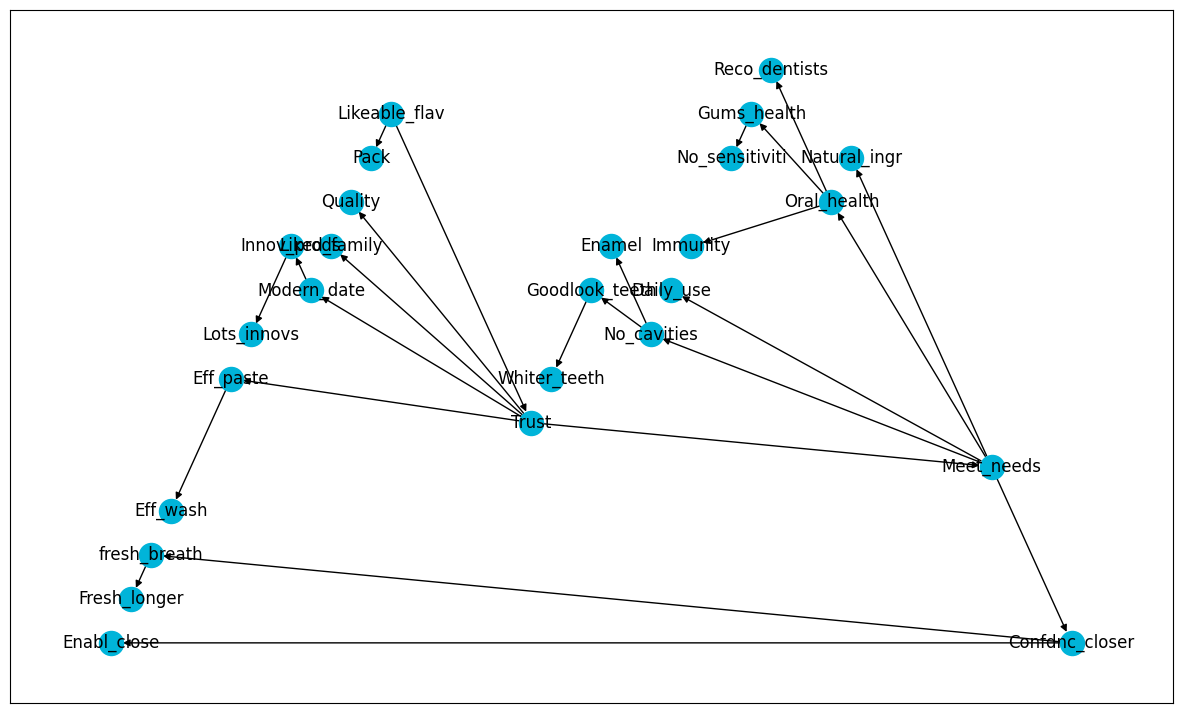

In [152]:
hc = HillClimbSearch(d)
best_model = hc.estimate(scoring_method=BicScore(d))
print(best_model.edges())

fig, ax = plt.subplots(figsize=(15,9))

pos = nx.planar_layout(best_model)
nx.draw_networkx(best_model, node_color='#00b4d9', pos=pos, with_labels=True, ax=ax) 

In [167]:
d = data[expl.image_columns].rename(columns=expl.image_columns_renamer)
d = d[d.notna().all(axis=1)]
d

,Enabl_close,fresh_breath,Natural_ingr,Oral_health,Confdnc_closer,Trust,Liked_family,Modern_date,Reco_dentists,Goodlook_teeth,...,Whiter_teeth,No_cavities,No_sensitiviti,Enamel,Daily_use,Eff_wash,Immunity,Quality,Lots_innovs,Innov_prods
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23996,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
23997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23998,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [168]:
hc = HillClimbSearch(d)
best_model = hc.estimate(scoring_method=BicScore(d))
print(best_model.edges())
print(len(best_model.edges()))

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Enabl_close', 'Confdnc_closer'), ('Enabl_close', 'Immunity'), ('Enabl_close', 'Liked_family'), ('Enabl_close', 'Goodlook_teeth'), ('Enabl_close', 'Lots_innovs'), ('Enabl_close', 'Quality'), ('Enabl_close', 'Trust'), ('Enabl_close', 'Pack'), ('Enabl_close', 'Fresh_longer'), ('fresh_breath', 'Eff_wash'), ('fresh_breath', 'Whiter_teeth'), ('fresh_breath', 'Quality'), ('Oral_health', 'Gums_health'), ('Oral_health', 'Immunity'), ('Oral_health', 'Eff_paste'), ('Oral_health', 'Reco_dentists'), ('Oral_health', 'Modern_date'), ('Oral_health', 'Daily_use'), ('Oral_health', 'Innov_prods'), ('Confdnc_closer', 'Liked_family'), ('Confdnc_closer', 'Goodlook_teeth'), ('Confdnc_closer', 'Trust'), ('Confdnc_closer', 'fresh_breath'), ('Confdnc_closer', 'Innov_prods'), ('Confdnc_closer', 'Fresh_longer'), ('Confdnc_closer', 'No_cavities'), ('Confdnc_closer', 'Likeable_flav'), ('Confdnc_closer', 'Oral_health'), ('Trust', 'Quality'), ('Trust', 'Meet_needs'), ('Trust', 'Eff_paste'), ('Trust', 'Likeable_fla

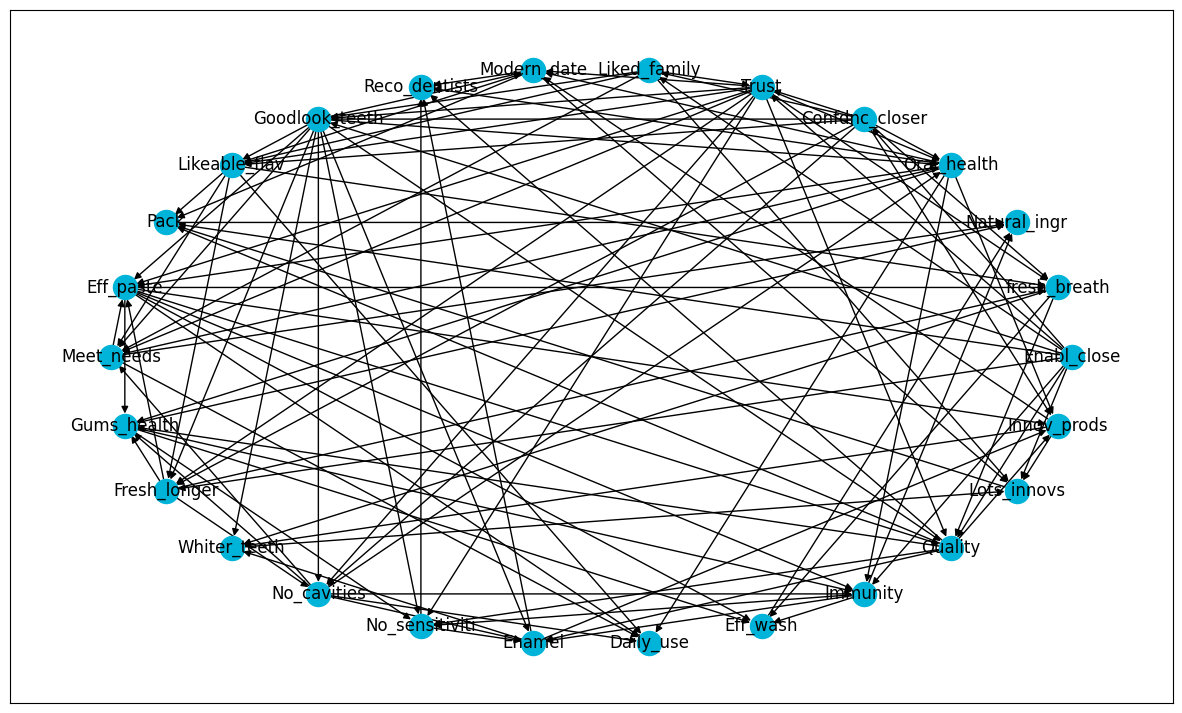

In [169]:
fig, ax = plt.subplots(figsize=(15,9))

pos = nx.circular_layout(best_model)
nx.draw_networkx(best_model, node_color='#00b4d9', pos=pos, with_labels=True, ax=ax) 

In [178]:
d = data[expl.mdf_columns + expl.power_premium_columns].rename(columns=expl.image_columns_renamer)
d = d[d.notna().all(axis=1)]
d

,Meaningful,Different,Salient,Power,Premium v2
0,-0.471127,-0.382125,-0.294842,4.413546,0.763057
2,-0.303403,-0.452965,-0.333698,5.546215,1.084037
3,-0.273832,0.414002,-0.543052,7.950031,1.245946
4,-0.396318,-0.396217,-0.334954,4.833347,0.926898
5,-0.573921,-0.417805,0.371342,7.824029,0.880657
...,...,...,...,...,...
23994,-0.434057,-0.531972,-0.289879,3.353580,0.922430
23996,-0.742901,0.677514,-0.344853,4.516578,1.290803
23997,-0.434057,-0.531972,-0.289879,3.353580,0.922430
23998,-0.389773,-0.320236,-0.179738,5.005224,1.218994


  0%|          | 0/1000000 [00:00<?, ?it/s]

[]
0


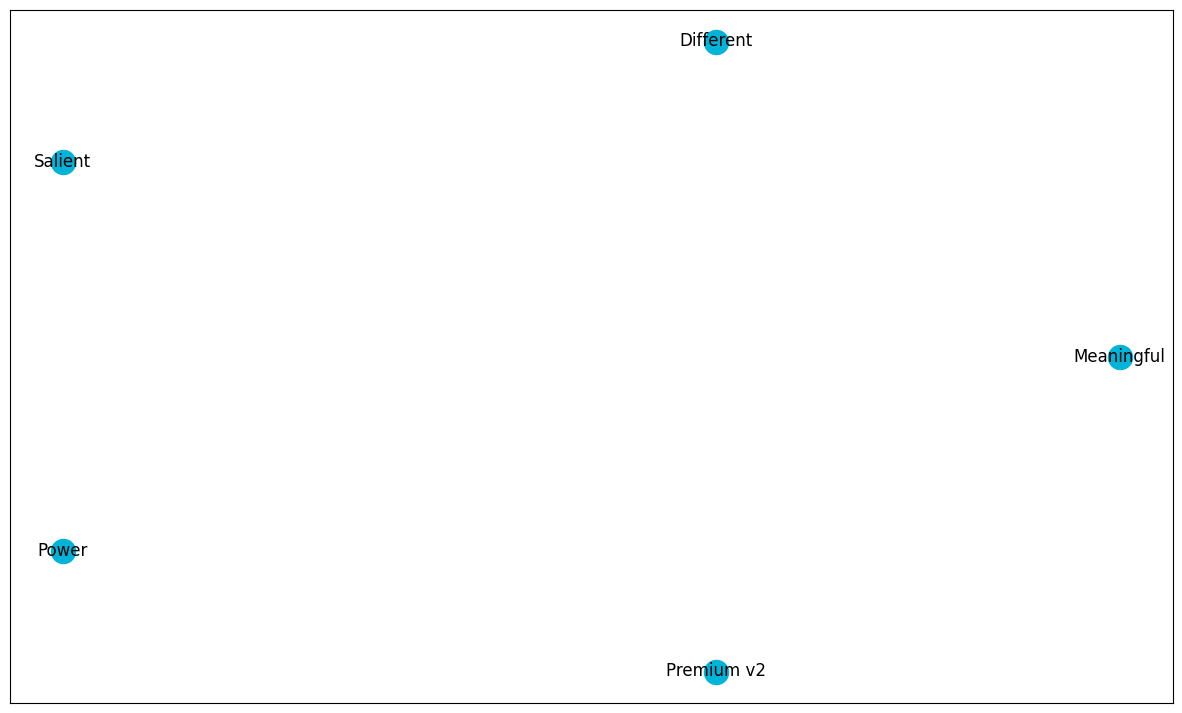

In [179]:
hc = HillClimbSearch(d)
best_model = hc.estimate(scoring_method=BicScore(d))
print(best_model.edges())
print(len(best_model.edges()))

fig, ax = plt.subplots(figsize=(15,9))

pos = nx.circular_layout(best_model)
nx.draw_networkx(best_model, node_color='#00b4d9', pos=pos, with_labels=True, ax=ax) 

In [180]:
from pgmpy.estimators import PC

est = PC(d)
skel, seperating_sets = est.build_skeleton(ci_test='pearsonr', significance_level=0.01)
print("Undirected edges: ", skel.edges())

  0%|          | 0/5 [00:00<?, ?it/s]

Undirected edges:  [('Meaningful', 'Power'), ('Meaningful', 'Premium v2'), ('Different', 'Power'), ('Salient', 'Power'), ('Salient', 'Premium v2'), ('Power', 'Premium v2')]


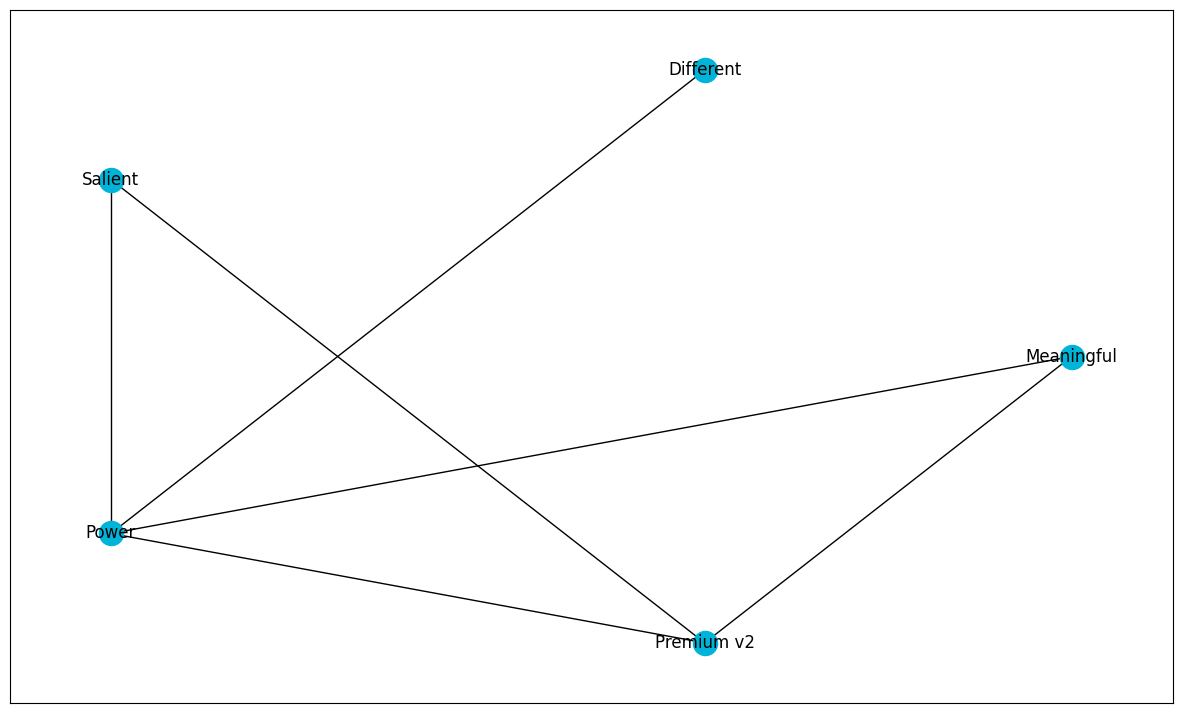

In [181]:
fig, ax = plt.subplots(figsize=(15,9))

pos = nx.circular_layout(skel)
nx.draw_networkx(skel, node_color='#00b4d9', pos=pos, with_labels=True, ax=ax) 

In [182]:
pdag = est.skeleton_to_pdag(skel, seperating_sets)
print("PDAG edges:       ", pdag.edges())

model = pdag.to_dag()
print("DAG edges:        ", model.edges())

PDAG edges:        [('Power', 'Premium v2'), ('Different', 'Power'), ('Salient', 'Power'), ('Salient', 'Premium v2'), ('Meaningful', 'Power'), ('Meaningful', 'Premium v2')]
DAG edges:         [('Power', 'Premium v2'), ('Different', 'Power'), ('Salient', 'Power'), ('Salient', 'Premium v2'), ('Meaningful', 'Power'), ('Meaningful', 'Premium v2')]


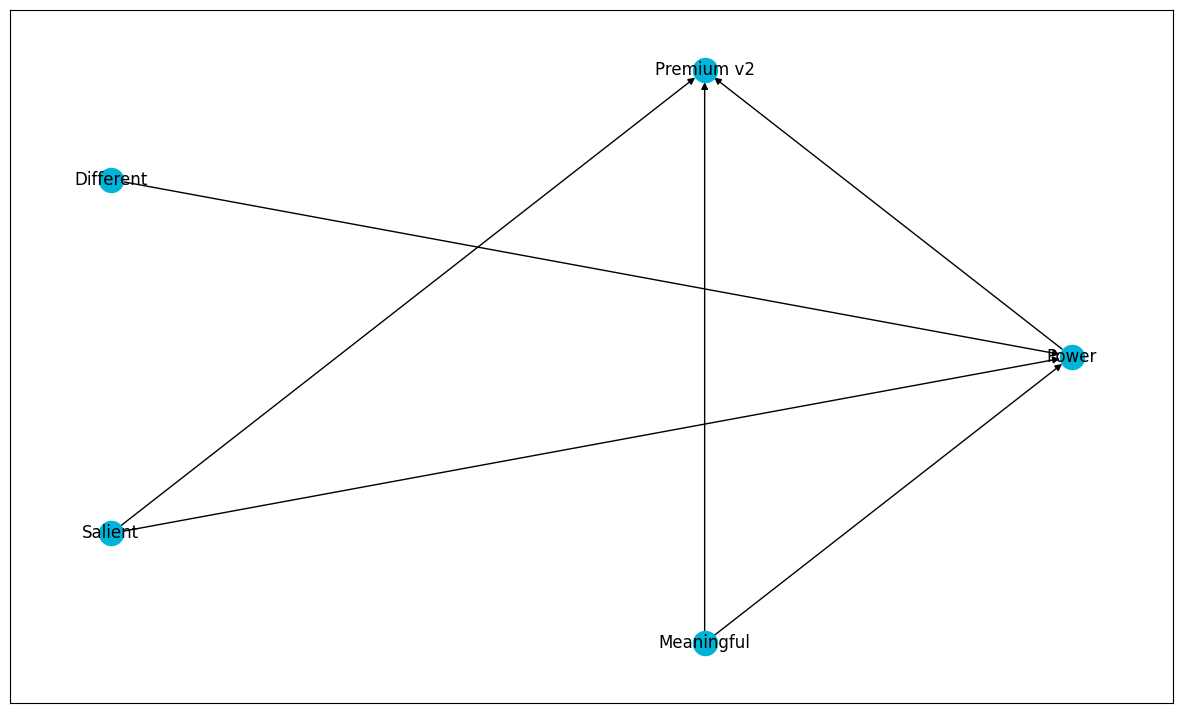

In [183]:
fig, ax = plt.subplots(figsize=(15,9))

pos = nx.circular_layout(pdag)
nx.draw_networkx(pdag, node_color='#00b4d9', pos=pos, with_labels=True, ax=ax) 

## cut soe to categories

In [11]:
d = data[soe_cols].rename(columns=expl.soe_columns_renamer)
d = d.drop(columns=['Trust'])
#d = d.mul(10).round()
d

,Enabl_close,fresh_breath,Natural_ingr,Oral_health,Confdnc_closer,Liked_family,Modern_date,Reco_dentists,Goodlook_teeth,Likeable_flav,...,Whiter_teeth,No_cavities,No_sensitiviti,Enamel,Daily_use,Eff_wash,Immunity,Quality,Lots_innovs,Innov_prods
0,0.00,0.000,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.00,0.00
1,NaN,NaN,0.0,NaN,0.0,NaN,0.000000,0.0,NaN,NaN,...,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.0,NaN,0.00
2,0.00,0.000,0.0,0.25,0.0,0.0,0.000000,0.0,0.333333,0.0,...,0.000000,0.142857,1.000000,0.000000,0.125,0.000000,0.000000,0.0,0.00,0.00
3,0.50,0.000,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.5,...,0.000000,0.142857,0.000000,0.000000,0.125,0.000000,0.000000,0.0,1.00,0.00
4,0.00,0.000,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.142857,0.000000,0.000000,0.125,0.000000,0.000000,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23996,0.25,0.125,0.0,0.00,0.0,0.0,0.142857,0.0,0.000000,0.0,...,0.333333,0.142857,0.142857,0.142857,0.500,0.142857,0.142857,0.2,0.25,0.25
23997,0.00,0.125,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.00,0.00
23998,0.00,0.125,0.0,0.00,0.0,0.0,0.142857,0.0,0.000000,0.0,...,0.000000,0.142857,0.142857,0.142857,0.000,0.142857,0.142857,0.0,0.00,0.00


In [12]:
hc = HillClimbSearch(d)
best_model = hc.estimate(scoring_method=BicScore(d))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('fresh_breath', 'Fresh_longer'), ('Oral_health', 'Immunity'), ('Oral_health', 'Modern_date'), ('Oral_health', 'Gums_health'), ('Oral_health', 'Reco_dentists'), ('Confdnc_closer', 'Enabl_close'), ('Confdnc_closer', 'fresh_breath'), ('Modern_date', 'Innov_prods'), ('Goodlook_teeth', 'Quality'), ('Goodlook_teeth', 'Whiter_teeth'), ('Likeable_flav', 'Meet_needs'), ('Likeable_flav', 'Liked_family'), ('Likeable_flav', 'Pack'), ('Eff_paste', 'Eff_wash'), ('Meet_needs', 'No_cavities'), ('Meet_needs', 'Daily_use'), ('Meet_needs', 'Oral_health'), ('Meet_needs', 'Eff_paste'), ('Meet_needs', 'Confdnc_closer'), ('Meet_needs', 'Natural_ingr'), ('Gums_health', 'No_sensitiviti'), ('No_cavities', 'Goodlook_teeth'), ('No_cavities', 'Enamel'), ('Innov_prods', 'Lots_innovs')]


In [ ]:
# Graph via networkx

fig, ax = plt.subplots(figsize=(15,9))
m = best_model
nx.draw_networkx(m, 
                 node_color='#00b4d9', 
                 pos=nx.random_layout(m), 
                 #pos=nx.planar_layout(m), 
                 with_labels=True, 
                 ax=ax) 

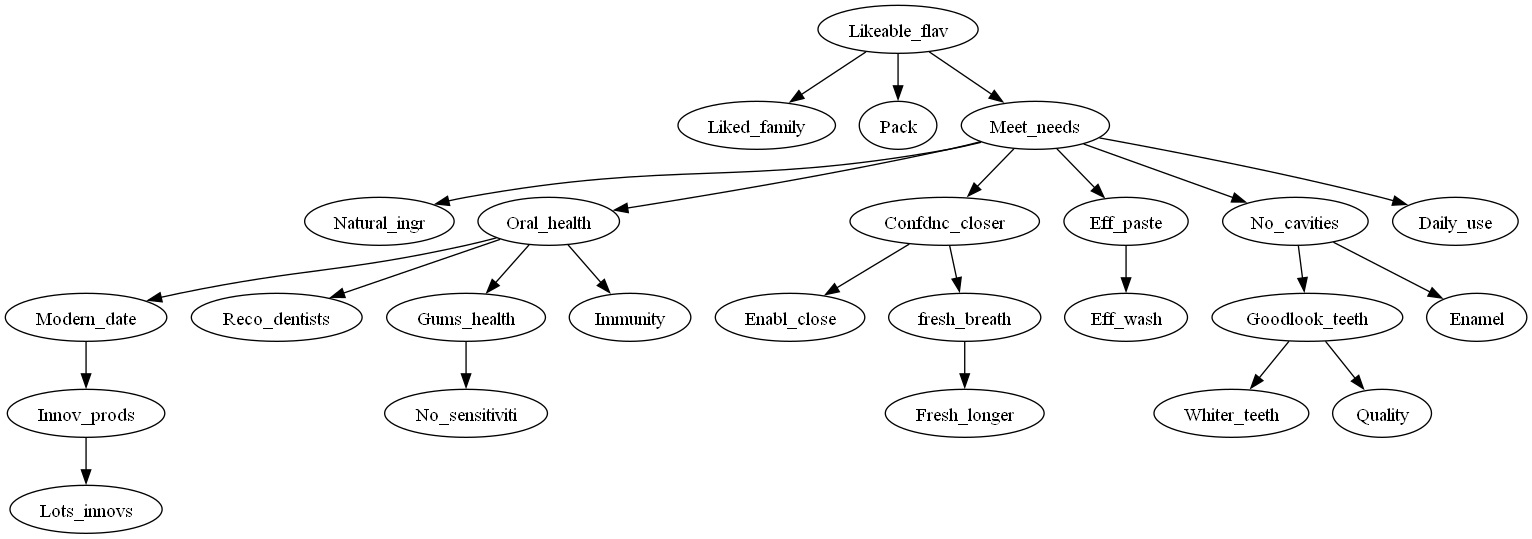

In [13]:
PlotModel(best_model)

# Hybrid search

In [58]:
di = data[image_cols].rename(columns=expl.image_columns_renamer)
di = di[di.notna().all(axis=1)]
di = di.drop(columns=['Trust'])
di

,Enabl_close,fresh_breath,Natural_ingr,Oral_health,Confdnc_closer,Liked_family,Modern_date,Reco_dentists,Goodlook_teeth,Likeable_flav,...,Whiter_teeth,No_cavities,No_sensitiviti,Enamel,Daily_use,Eff_wash,Immunity,Quality,Lots_innovs,Innov_prods
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23996,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
23997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23998,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [82]:
print(di.columns)
selection = ['Enabl_close', 'fresh_breath', 'Natural_ingr', 'Oral_health',
       'Confdnc_closer', 'Liked_family', 'Modern_date', 'Reco_dentists', 'Goodlook_teeth']

Index(['Enabl_close', 'fresh_breath', 'Natural_ingr', 'Oral_health',
       'Confdnc_closer', 'Liked_family', 'Modern_date', 'Reco_dentists',
       'Goodlook_teeth', 'Likeable_flav', 'Pack', 'Eff_paste', 'Meet_needs',
       'Gums_health', 'Fresh_longer', 'Whiter_teeth', 'No_cavities',
       'No_sensitiviti', 'Enamel', 'Daily_use', 'Eff_wash', 'Immunity',
       'Quality', 'Lots_innovs', 'Innov_prods'],
      dtype='object')


In [15]:
from pgmpy.estimators import MmhcEstimator
from pgmpy.estimators import BDeuScore

In [72]:
from datetime import datetime

In [83]:
start = datetime.now()

mmhc = MmhcEstimator(di[selection])
skeleton = mmhc.mmpc()
print("Part 1) Skeleton: ", skeleton.edges())

print(datetime.now()-start)

Part 1) Skeleton:  [('Enabl_close', 'Confdnc_closer'), ('Enabl_close', 'fresh_breath'), ('Enabl_close', 'Oral_health'), ('Enabl_close', 'Goodlook_teeth'), ('Enabl_close', 'Liked_family'), ('Enabl_close', 'Natural_ingr'), ('Enabl_close', 'Reco_dentists'), ('fresh_breath', 'Confdnc_closer'), ('fresh_breath', 'Modern_date'), ('fresh_breath', 'Oral_health'), ('fresh_breath', 'Liked_family'), ('fresh_breath', 'Goodlook_teeth'), ('fresh_breath', 'Reco_dentists'), ('Natural_ingr', 'Modern_date'), ('Natural_ingr', 'Oral_health'), ('Natural_ingr', 'Liked_family'), ('Natural_ingr', 'Reco_dentists'), ('Oral_health', 'Confdnc_closer'), ('Oral_health', 'Modern_date'), ('Oral_health', 'Goodlook_teeth'), ('Oral_health', 'Reco_dentists'), ('Confdnc_closer', 'Modern_date'), ('Confdnc_closer', 'Liked_family'), ('Confdnc_closer', 'Goodlook_teeth'), ('Liked_family', 'Modern_date'), ('Liked_family', 'Goodlook_teeth'), ('Modern_date', 'Goodlook_teeth'), ('Modern_date', 'Reco_dentists'), ('Reco_dentists', 'G

In [84]:
### слишком долго для всего списка

# with drivers

In [93]:
selected_cols = ['Enabl_close', 'Confdnc_closer', 'Liked_family', 'Modern_date', 'Likeable_flav', 'Daily_use', 'Quality']

In [94]:
factor_cols

['@input.Affinity', '@input.MeetNeeds', '@input.Dynamic', '@input.Unique']

In [108]:
dda = data.rename(columns=expl.soe_columns_renamer)[selected_cols + ['@input.Affinity', '@input.MeetNeeds', '@input.Dynamic', '@input.Unique']]
dda = dda[dda.notna().all(axis=1)]
dda

,Enabl_close,Confdnc_closer,Liked_family,Modern_date,Likeable_flav,Daily_use,Quality,@input.Affinity,@input.MeetNeeds,@input.Dynamic,@input.Unique
0,0.00,0.0,0.0,0.000000,0.0,0.000,0.0,0.008745,0.014265,0.030010,0.021613
2,0.00,0.0,0.0,0.000000,0.0,0.125,0.0,0.030145,0.014265,0.030010,0.034788
3,0.50,0.0,0.0,0.000000,0.5,0.125,0.0,0.030145,0.014265,0.086310,0.094500
4,0.00,0.0,0.0,0.000000,0.0,0.125,0.0,0.008745,0.014265,0.030010,0.034788
5,0.00,0.0,0.0,0.000000,0.0,0.125,0.0,0.008745,0.014265,0.030010,0.034788
...,...,...,...,...,...,...,...,...,...,...,...
23994,0.00,0.0,0.0,0.000000,0.0,0.000,0.0,0.009412,0.010225,0.020702,0.021645
23996,0.25,0.0,0.0,0.142857,0.0,0.500,0.2,0.019469,0.017566,0.096487,0.027432
23997,0.00,0.0,0.0,0.000000,0.0,0.000,0.0,0.009412,0.010225,0.020702,0.021645
23998,0.00,0.0,0.0,0.142857,0.0,0.000,0.0,0.019469,0.032828,0.037734,0.027432


In [ ]:
hc = HillClimbSearch(dda)
best_model = hc.estimate(scoring_method=BicScore(dda))
#print(best_model.edges())
PlotModel(best_model)

In [110]:
start = datetime.now()

mmhc = MmhcEstimator(dda)
skeleton = mmhc.mmpc()
print("Part 1) Skeleton: ", skeleton.edges())

print(datetime.now()-start)

Part 1) Skeleton:  [('Enabl_close', 'Modern_date'), ('Enabl_close', 'Liked_family'), ('Enabl_close', '@input.Dynamic'), ('Confdnc_closer', 'Likeable_flav'), ('Confdnc_closer', 'Daily_use'), ('Confdnc_closer', '@input.Dynamic'), ('Confdnc_closer', 'Quality'), ('Liked_family', 'Modern_date'), ('Liked_family', '@input.MeetNeeds'), ('Modern_date', 'Daily_use'), ('Modern_date', '@input.Dynamic'), ('Modern_date', 'Quality'), ('Likeable_flav', '@input.MeetNeeds'), ('Likeable_flav', '@input.Dynamic'), ('Daily_use', '@input.Affinity'), ('Daily_use', '@input.Dynamic'), ('Daily_use', '@input.MeetNeeds'), ('Daily_use', '@input.Unique'), ('Quality', '@input.Dynamic'), ('@input.Affinity', '@input.Unique'), ('@input.Affinity', '@input.Dynamic'), ('@input.Affinity', '@input.MeetNeeds'), ('@input.MeetNeeds', '@input.Unique'), ('@input.MeetNeeds', '@input.Dynamic'), ('@input.Dynamic', '@input.Unique')]
1 day, 12:28:58.604833


In [113]:
hc = HillClimbSearch(dda)
model = hc.estimate(tabu_length=10, white_list=skeleton.to_directed().edges(), scoring_method=BDeuScore(dda))
print("Part 2) Model:    ", model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

Part 2) Model:     [('Enabl_close', 'Liked_family'), ('Confdnc_closer', 'Quality'), ('Confdnc_closer', 'Daily_use'), ('Liked_family', '@input.MeetNeeds'), ('Modern_date', 'Enabl_close'), ('Modern_date', 'Quality'), ('Likeable_flav', 'Confdnc_closer'), ('Daily_use', 'Modern_date'), ('Quality', '@input.Dynamic')]


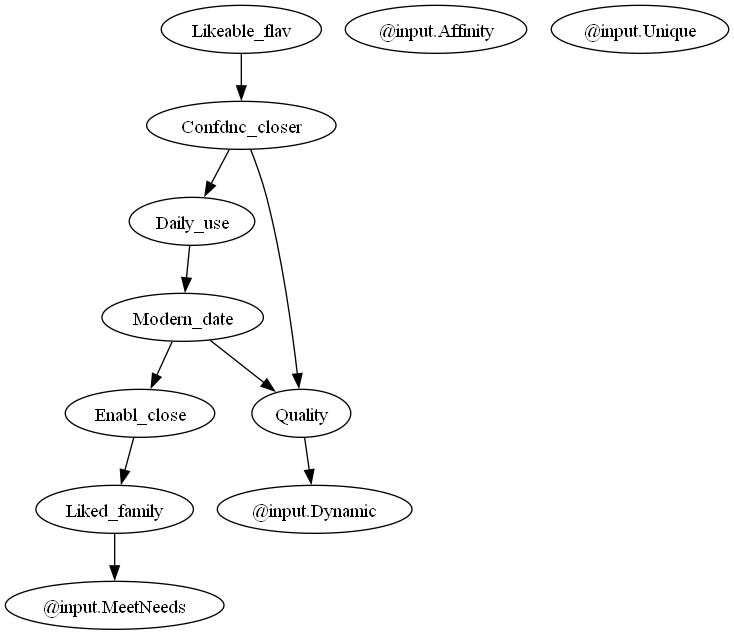

In [114]:
PlotModel(model)

In [111]:
import pygraphviz as pgv
import io

from PIL import Image

def PlotModel(model):
    stream = io.BytesIO()
    model.to_graphviz().draw(stream, format='png', prog='dot')
    return Image.open(stream)

In [118]:
expl.GetCleanSOEDataForSet(expl.image_sets[2])


AttributeError: 'ExploratoryAnalysis' object has no attribute 'image_sets'